        0         1       2
0  14.447  0.003823  0.0034
1  14.480       NaN     NaN
2  14.514       NaN     NaN
3  14.547       NaN     NaN
4  14.581       NaN     NaN
         0         1         2
0   14.447  0.003823  0.003400
5   14.615  0.004043  0.003473
10  14.783  0.004321  0.003469
15  14.951  0.004620  0.003500
20  15.119  0.004875  0.003496


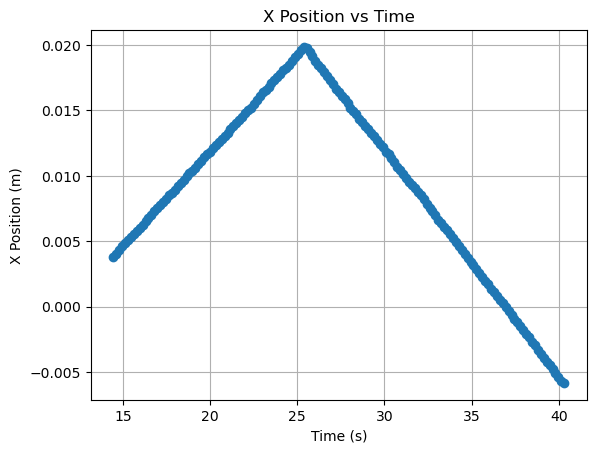

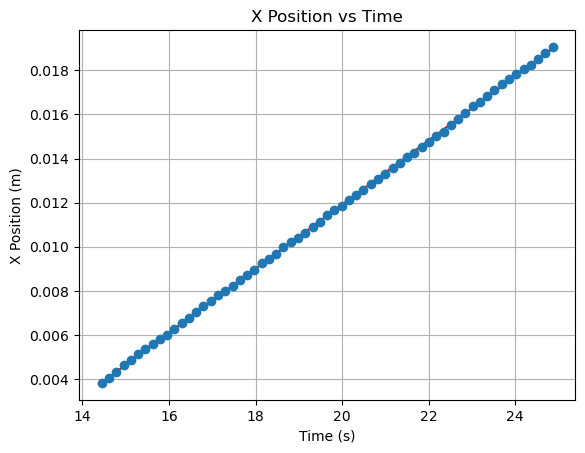

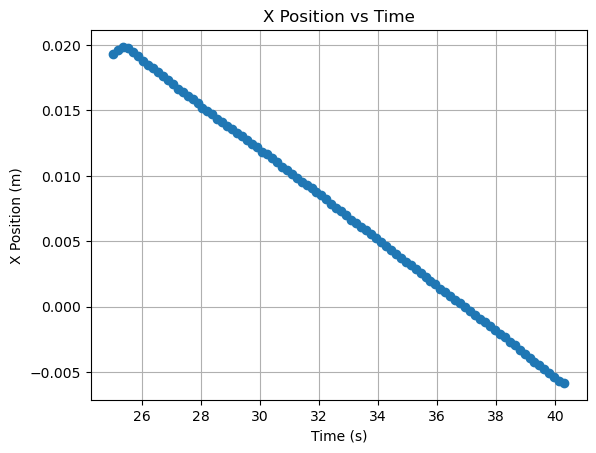

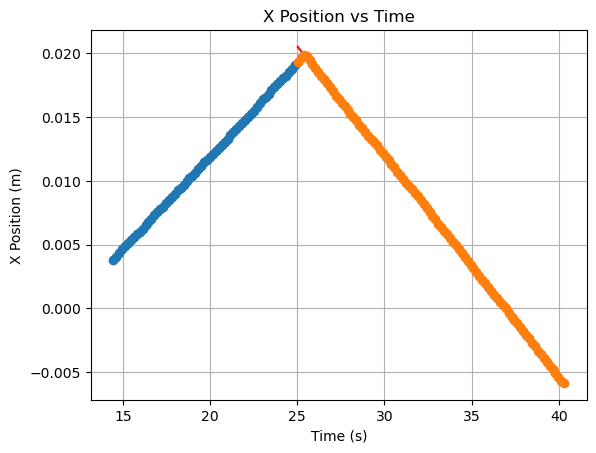

Slope 1:  0.001454072435125865
Slope 2:  -0.0017214066584846652


In [1]:
# Millikan Oil Drop Experiment analysis. First Column is time, second column is x distance, third column is y distance. 

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from scipy.constants import e, epsilon_0, pi

# Constants
g = 9.81
rho_oil = 879.0 # kg/m^3
rho_air = 1.225 # kg/m^3
eta_air = 1.81e-5 # kg/m/s
d = 7.5e-6 # m
e = 1.602e-19 # C
epsilon_0 = 8.85e-12 # F/m

# Load data from C:\Users\swali\Downloads 
data = pd.read_csv('C:/Users/swali/Downloads/MassA0408.txt', delimiter = '\t', header = None)

print(data.head())
# Only plot values where no nan values are present
data = data.dropna()
print(data.head())

plt.plot(data[0], data[1], 'o')
plt.xlabel('Time (s)')
plt.ylabel('X Position (m)')
plt.title('X Position vs Time')
plt.grid()
plt.show()

# Fit a line to the x position data
def linear(x, m, b):
    return m*x + b

# the slop starts as positive and then becomes negative. We will fit the first half of the data to a line and the second half to a line. Switch at approximately 25 seconds
# First half
data1 = data[data[0] < 25]
popt1, pcov1 = curve_fit(linear, data1[0], data1[1])
fig, ax = plt.subplots()
# Plot the data in one and the line in the other
ax.plot(data1[0], linear(data1[0], *popt1), 'r-')
ax.plot(data1[0], data1[1], 'o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('X Position (m)')
ax.set_title('X Position vs Time')
ax.grid()
plt.show()


# Second half
data2 = data[data[0] > 25]
popt2, pcov2 = curve_fit(linear, data2[0], data2[1])
plt.plot(data2[0], data2[1], 'o')
plt.xlabel('Time (s)')
plt.ylabel('X Position (m)')
plt.title('X Position vs Time')
plt.grid()
plt.show()

# Fitting linear plots to data1 amd data2
fig, ax = plt.subplots()
# Plot the data in one and the line in the other
ax.plot(data1[0], linear(data1[0], *popt1), 'r-')
ax.plot(data1[0], data1[1], 'o')
ax.plot(data2[0], linear(data2[0], *popt2), 'r-')
ax.plot(data2[0], data2[1], 'o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('X Position (m)')
ax.set_title('X Position vs Time')
ax.grid()
plt.show()

# print the slopes
print('Slope 1: ', popt1[0])
print('Slope 2: ', popt2[0])





         0         1         2
0  352.750  0.000801  0.005465
1  352.783       NaN       NaN
2  352.817       NaN       NaN
3  352.850       NaN       NaN
4  352.884       NaN       NaN
          0         1         2
0   352.750  0.000801  0.005465
10  353.086  0.000983  0.005434
20  353.422  0.001120  0.005432
25  353.590  0.001200  0.005433
30  353.757  0.001282  0.005413


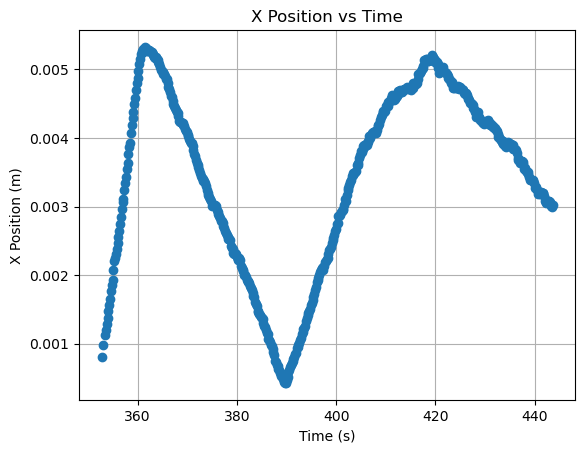

In [4]:
# Now doing MassA0325.txt
data = pd.read_csv('C:/Users/swali/Downloads/MassA0325.txt', delimiter = '\t', header = None)

print(data.head())
# Only plot values where no nan values are present
data = data.dropna()
print(data.head())

plt.plot(data[0], data[1], 'o')
plt.xlabel('Time (s)')
plt.ylabel('X Position (m)')
plt.title('X Position vs Time')
plt.grid()
plt.show()



In [ ]:
# For MassA0325.txt the data basically is in four fucking parts. The First part chops off at approx 360s.I can be precise and find these data points. But seriously,Jesus Christ.

# Finding max value of data[1] where data[1] is greater than 0.05

maxpoint